In [55]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [56]:
dataset = pd.read_csv(
    "/content/Salary Data.csv"
)
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [57]:
print(f"Dataset size: {dataset.shape[0]}")

Dataset size: 375


In [58]:
dataset.isna().sum()
dataset = dataset.dropna(axis=0)

In [59]:
print(f"Total unique values in 'Gender' column: {len(dataset['Gender'].unique())}")
print(f"Total unique values in 'Education Level' column: {len(dataset['Education Level'].unique())}")
print(f"Total unique values in 'Job Title' column: {len(dataset['Job Title'].unique())}")

Total unique values in 'Gender' column: 2
Total unique values in 'Education Level' column: 3
Total unique values in 'Job Title' column: 174


In [60]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
dataset["Gender"] = gender_encoder.fit_transform(dataset["Gender"])

edu_level_encoder = LabelEncoder()
dataset["Education Level"] = edu_level_encoder.fit_transform(
    dataset["Education Level"]
)

dataset = pd.get_dummies(
    dataset, columns=["Job Title"], prefix="JobTitle",
    drop_first=False, dtype=int
)

dataset.head()

,Age,Gender,Education Level,Years of Experience,Salary,JobTitle_Account Manager,JobTitle_Accountant,JobTitle_Administrative Assistant,JobTitle_Business Analyst,JobTitle_Business Development Manager,JobTitle_Business Intelligence Analyst,JobTitle_CEO,JobTitle_Chief Data Officer,JobTitle_Chief Technology Officer,JobTitle_Content Marketing Manager,JobTitle_Copywriter,JobTitle_Creative Director,JobTitle_Customer Service Manager,JobTitle_Customer Service Rep,JobTitle_Customer Service Representative,JobTitle_Customer Success Manager,JobTitle_Customer Success Rep,JobTitle_Data Analyst,JobTitle_Data Entry Clerk,JobTitle_Data Scientist,JobTitle_Digital Content Producer,JobTitle_Digital Marketing Manager,JobTitle_Director,JobTitle_Director of Business Development,JobTitle_Director of Engineering,JobTitle_Director of Finance,JobTitle_Director of HR,JobTitle_Director of Human Capital,JobTitle_Director of Human Resources,JobTitle_Director of Marketing,JobTitle_Director of Operations,JobTitle_Director of Product Management,JobTitle_Director of Sales,JobTitle_Director of Sales and Marketing,JobTitle_Event Coordinator,JobTitle_Financial Advisor,JobTitle_Financial Analyst,JobTitle_Financial Manager,JobTitle_Graphic Designer,JobTitle_HR Generalist,JobTitle_HR Manager,JobTitle_Help Desk Analyst,JobTitle_Human Resources Director,JobTitle_IT Manager,JobTitle_IT Support,JobTitle_IT Support Specialist,JobTitle_Junior Account Manager,JobTitle_Junior Accountant,JobTitle_Junior Advertising Coordinator,JobTitle_Junior Business Analyst,JobTitle_Junior Business Development Associate,JobTitle_Junior Business Operations Analyst,JobTitle_Junior Copywriter,JobTitle_Junior Customer Support Specialist,JobTitle_Junior Data Analyst,JobTitle_Junior Data Scientist,JobTitle_Junior Designer,JobTitle_Junior Developer,JobTitle_Junior Financial Advisor,JobTitle_Junior Financial Analyst,JobTitle_Junior HR Coordinator,JobTitle_Junior HR Generalist,JobTitle_Junior Marketing Analyst,JobTitle_Junior Marketing Coordinator,JobTitle_Junior Marketing Manager,JobTitle_Junior Marketing Specialist,JobTitle_Junior Operations Analyst,JobTitle_Junior Operations Coordinator,JobTitle_Junior Operations Manager,JobTitle_Junior Product Manager,JobTitle_Junior Project Manager,JobTitle_Junior Recruiter,JobTitle_Junior Research Scientist,JobTitle_Junior Sales Representative,JobTitle_Junior Social Media Manager,JobTitle_Junior Social Media Specialist,JobTitle_Junior Software Developer,JobTitle_Junior Software Engineer,JobTitle_Junior UX Designer,JobTitle_Junior Web Designer,JobTitle_Junior Web Developer,JobTitle_Marketing Analyst,JobTitle_Marketing Coordinator,JobTitle_Marketing Manager,JobTitle_Marketing Specialist,JobTitle_Network Engineer,JobTitle_Office Manager,JobTitle_Operations Analyst,JobTitle_Operations Director,JobTitle_Operations Manager,JobTitle_Principal Engineer,JobTitle_Principal Scientist,JobTitle_Product Designer,JobTitle_Product Manager,JobTitle_Product Marketing Manager,JobTitle_Project Engineer,JobTitle_Project Manager,JobTitle_Public Relations Manager,JobTitle_Recruiter,JobTitle_Research Director,JobTitle_Research Scientist,JobTitle_Sales Associate,JobTitle_Sales Director,JobTitle_Sales Executive,JobTitle_Sales Manager,JobTitle_Sales Operations Manager,JobTitle_Sales Representative,JobTitle_Senior Account Executive,JobTitle_Senior Account Manager,JobTitle_Senior Accountant,JobTitle_Senior Business Analyst,JobTitle_Senior Business Development Manager,JobTitle_Senior Consultant,JobTitle_Senior Data Analyst,JobTitle_Senior Data Engineer,JobTitle_Senior Data Scientist,JobTitle_Senior Engineer,JobTitle_Senior Financial Advisor,JobTitle_Senior Financial Analyst,JobTitle_Senior Financial Manager,JobTitle_Senior Graphic Designer,JobTitle_Senior HR Generalist,JobTitle_Senior HR Manager,JobTitle_Senior HR Specialist,JobTitle_Senior Human Resources Coordinator,JobTitle_Senior Human Resources Manager,JobTitle_Senior Human Resources Specialist,JobTitle_Senior IT Consultant,JobTitle_Sen

In [61]:
dataset[["Age", "Gender", "Education Level", "Years of Experience", "Salary"]].describe()

,Age,Gender,Education Level,Years of Experience,Salary
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,37.431635,0.520107,0.536193,10.030831,100577.345845
std,7.069073,0.500267,0.723569,6.557007,48240.013482
min,23.000000,0.000000,0.000000,0.000000,350.000000
25%,31.000000,0.000000,0.000000,4.000000,55000.000000
50%,36.000000,1.000000,0.000000,9.000000,95000.000000
75%,44.000000,1.000000,1.000000,15.000000,140000.000000
max,53.000000,1.000000,2.000000,25.000000,250000.000000


In [62]:
from sklearn.preprocessing import StandardScaler

normalize_columns = ["Age", "Years of Experience", "Salary"]
scaler = StandardScaler()
dataset[normalize_columns] = scaler.fit_transform(dataset[normalize_columns])

dataset[normalize_columns].head()

,Age,Years of Experience,Salary
0,-0.769398,-0.768276,-0.219559
1,-1.336003,-1.073702,-0.738498
2,1.072068,0.758859,1.025892
3,-0.202793,-0.462849,-0.842285
4,2.063627,1.522426,2.063768


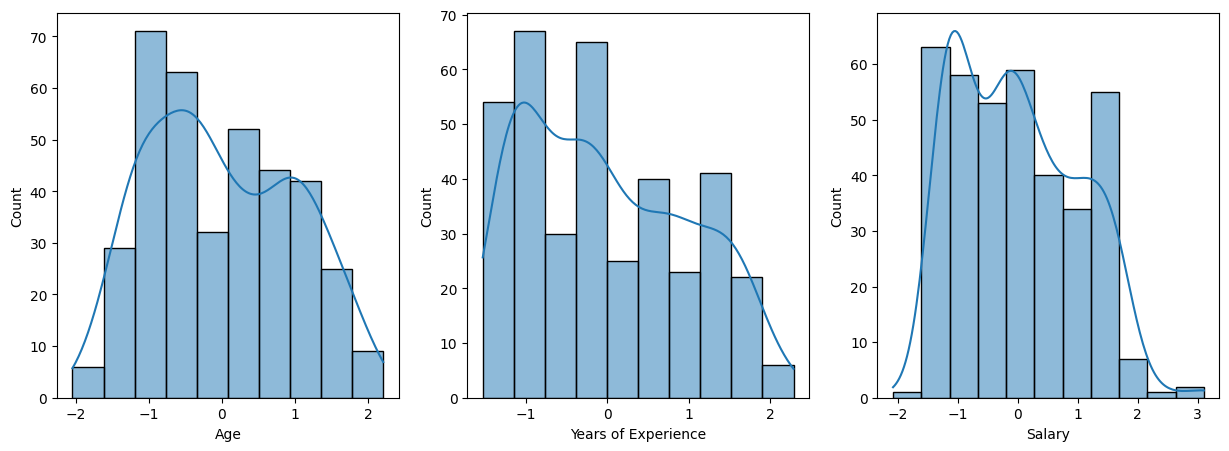

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns

_, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=100)

for i, column in enumerate(["Age", "Years of Experience", "Salary"]):
    sns.histplot(dataset[column], kde=True, ax=axes[i])

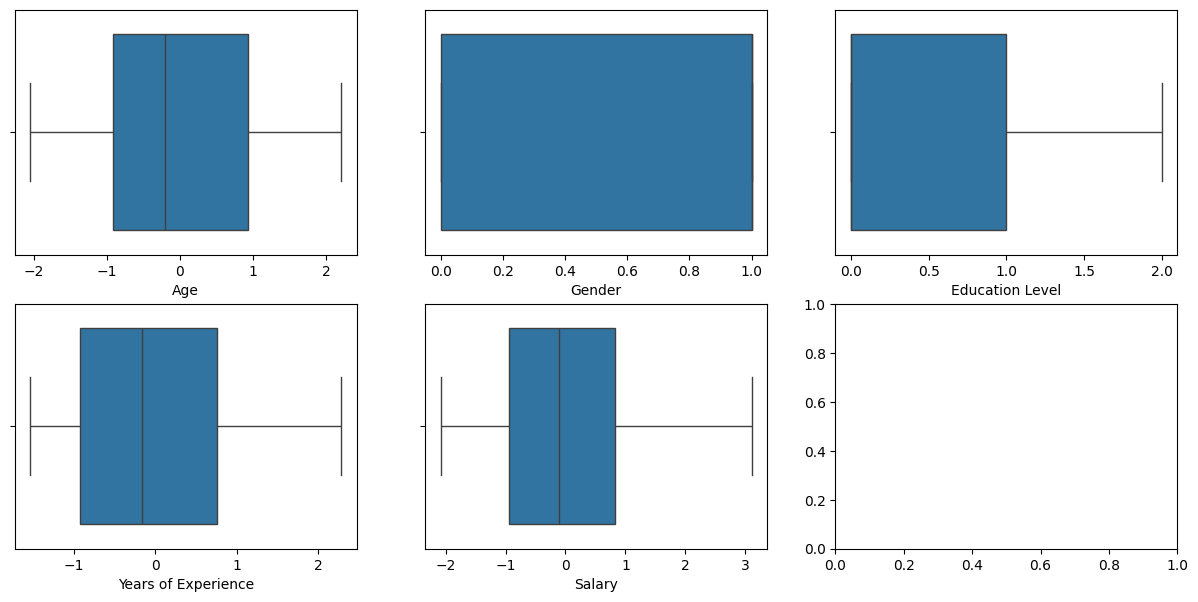

In [64]:
_, axes = plt.subplots(2, 3, figsize=(15, 7), dpi=100)

col = 0
row = 0
for column in ["Age", "Gender", "Education Level", "Years of Experience", "Salary"]:
    sns.boxplot(x=column, data=dataset, ax=axes[col, row])
    col, row = (col+1, 0) if row >= 2 else (col, row+1)

In [65]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["Salary"], axis=1, inplace=False)
y = dataset[["Salary"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train dataset size: {X_train.shape[0]}")
print(f"Test dataset size: {X_test.shape[0]}")

Train dataset size: 298
Test dataset size: 75


In [66]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=30,
    max_depth=10,
    n_jobs=-1,
    random_state=42,
    verbose=0,
    bootstrap=True,
    oob_score=True,
    criterion="absolute_error",
    max_features=1.0,
    min_samples_split=30,
)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_split=30, n_estimators=30, n_jobs=-1,
                      oob_score=True, random_state=42)

In [67]:
# Save the model
import pickle
filename = 'my_random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved as {filename}")

# Load the model (in a new session or later)
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully")


Model saved as my_random_forest_model.pkl
Model loaded successfully


In [68]:
print(f"Train score: {model.score(X_train, y_train)}")
print(f"Test score: {model.score(X_test, y_test)}")

Train score: 0.9178897041282124
Test score: 0.887371915720034


In [69]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train dataset Mean Squared Error: {train_mse}")

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test dataset Mean Squared Error: {test_mse}")

Train dataset Mean Squared Error: 0.0813873650622826
Test dataset Mean Squared Error: 0.11635130474855923


In [70]:
import numpy as np

train_r_mse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Train dataset Root Mean Squared Error: {train_r_mse}")

test_r_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Train datasetRoot Mean Squared Error: {test_r_mse}")

Train dataset Root Mean Squared Error: 0.28528470877753437
Train datasetRoot Mean Squared Error: 0.3411030705645425


In [71]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
print(f"Train dataset R-squared: {train_r2}")

test_r2 = r2_score(y_test, y_test_pred)
print(f"Test dataset R-squared: {test_r2}")

Train dataset R-squared: 0.9178897041282124
Test dataset R-squared: 0.887371915720034


In [72]:
def adjusted_r2(r2, n, p):
    return 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

train_adj_r2 = adjusted_r2(train_r2, len(y_train), 5)
print(f"Train dataset Adjusted R2 Score: {train_adj_r2}")

test_adj_r2 = adjusted_r2(test_r2, len(y_test), 5)
print(f"Test dataset Adjusted R2 Score: {test_adj_r2}")

Train dataset Adjusted R2 Score: 0.9164837059112297
Test dataset Adjusted R2 Score: 0.8792104603374278
